In [63]:
import torch
import random
import scipy
import os
from PIL import Image
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import math
import time
import matplotlib.image
import pprint
import datetime
import torch
import numpy as np
from PIL import Image
import torch


from datetime import timedelta
start = time.time()
cuda_opt = True
if torch.cuda.is_available() & cuda_opt:
    DEVICE = "cuda"
else:
    DEVICE = "cpu"
    

In [64]:
def read_image(file_name):
    image_path = "/mnt/Data/darijani/AdaLISTA/natural_images/"+str(file_name)
    X = (torch.from_numpy(io.imread(image_path)).to(torch.cdouble)).to(DEVICE)
    return X
def show_image(X):
    image = torch.abs(X)
    image = image/torch.max(image)
    image = image*255.0
    image = image.detach().cpu().numpy().astype(int)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def save_image(Xhats,N,name):
    X = torch.abs(Xhats)
    X = X/torch.max(X)
    numpy_array = X.detach().cpu().numpy()

    # # Convert the NumPy array to a PIL image
    pil_image = Image.fromarray((numpy_array * 255).astype(np.uint8))

    # Save the PIL image as a PNG image
    output_path =  "/mnt/Data/darijani/AdaLISTA/natural_images/"
    file_name = name+"_"+str(N)+"_"+'.png'
    pil_image.save(output_path+file_name)
    # im.save(file_name)



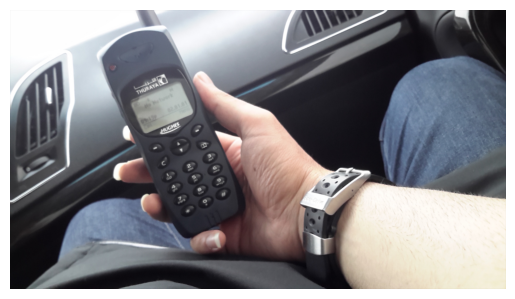

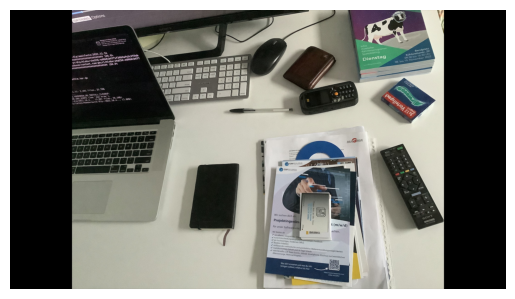

In [65]:
X_1 = read_image("sat.jpg")
save_image(torch.abs(X_1),0,"sat")
X_1_fft = torch.zeros(X_1.shape,dtype=torch.cdouble,device=DEVICE)
X_1_recons = torch.zeros(X_1.shape,dtype=torch.cdouble,device=DEVICE)
X_2 = read_image("job.jpg")
save_image(torch.abs(X_2),0,"job")
X_2_fft = torch.zeros(X_2.shape,dtype=torch.cdouble,device=DEVICE)
X_2_recons = torch.zeros(X_2.shape,dtype=torch.cdouble,device=DEVICE)
show_image(X_1)
show_image(X_2)



In [66]:
for color_codes in range(0,X_1_fft.shape[2]):
    X_1_fft[:,:,color_codes] = torch.fft.fft2(X_1[:,:,color_codes])
    X_2_fft[:,:,color_codes] = torch.fft.fft2(X_2[:,:,color_codes])
    print (color_codes)

X_1_fft_abs = torch.abs(X_1_fft)
X_1_fft_arg = torch.angle(X_1_fft)
X_1_fft_phase = torch.exp(1j*X_1_fft_arg)
X_2_fft_abs = torch.abs(X_2_fft)
X_2_fft_arg = torch.angle(X_2_fft)
X_2_fft_phase = torch.exp(1j*X_2_fft_arg)

phase_swap = True
if phase_swap:
    X_1_mul = torch.mul(X_1_fft_abs,X_2_fft_phase)
    X_2_mul = torch.mul(X_2_fft_abs,X_1_fft_phase)
else:
    X_1_mul = torch.mul(X_1_fft_abs,X_1_fft_phase)
    X_2_mul = torch.mul(X_2_fft_abs,X_2_fft_phase)




0
1
2


In [67]:
for color_codes in range(0,X_1_recons.shape[2]):
    X_1_recons[:,:,color_codes] = torch.fft.ifft2(X_1_mul[:,:,color_codes])
    X_2_recons[:,:,color_codes] = torch.fft.ifft2(X_2_mul[:,:,color_codes])
    print (color_codes)

0
1
2


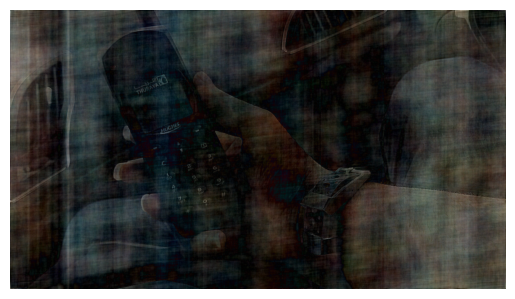

In [68]:
save_image(X_1_recons,1,"sat")
save_image(X_2_recons,1,"job")
show_image(X_1_recons)
show_image(X_2_recons)